## P7

In [7]:
import math
def E(u,v):
    return math.e**u + math.e**(2*v) + math.e**(u*v) + u**2 - 2*u*v + 2*v**2 - 3*u -2*v
def E_u(u,v):
    return math.e**u + v*math.e**(u*v) + 2*u - 2*v - 3
def E_v(u,v):
    return 2*math.e**(2*v) + u*math.e**(u*v) - 2*u + 4*v - 2

    

In [8]:
u,v = 0,0
for t in range (5):
    u = u - 0.01* E_u(u,v)
    v = v - 0.01* E_v(u,v)
print(E(u,v))

2.824909495379789


## P10

In [1]:
import math
def E(u,v):
    return math.e**u + math.e**(2*v) + math.e**(u*v) + u**2 - 2*u*v + 2*v**2 - 3*u -2*v
def E_u(u,v):
    return math.e**u + v*math.e**(u*v) + 2*u - 2*v - 3
def E_v(u,v):
    return 2*math.e**(2*v) + u*math.e**(u*v) - 2*u + 4*v - 2
def E_u2(u,v):
    return math.e**u + v**2*math.e**(u*v) + 2
def E_v2(u,v):
    return 4*math.e**(2*v) + u**2*math.e**(u*v) + 4

In [2]:
u,v = 0,0
for t in range (5):
    u = u - 1/ E_u2(u,v)* E_u(u,v)
    v = v - 1/ E_v2(u,v)* E_v(u,v)
print(E(u,v))

2.360823345643142


## P13

In [3]:
import numpy as np

## data initial
N = 1000
lst = []
for t in range(1000):
    x1 = np.random.uniform(-1, 1, (N,1))
    x2 = np.random.uniform(-1, 1, (N,1))
    prob = np.random.uniform(0,1,(N,1))
    y = np.sign(x1**2 + x2**2 - 0.6) * (prob >= 0.1)
    x = np.mat(np.concatenate((np.ones((N,1)),x1, x2), axis=1))

    ## to get w_lin , we need to calculate pseudo_inverse
    pseu_inv = np.linalg.pinv(x)
    w = pseu_inv * y
    y_hat = x*w
    errorNum = np.sum(y!=np.sign(y_hat))
    lst.append(errorNum/N)
print(sum(lst)/len(lst))

0.5568679999999994


## P14

In [3]:
N = 1000
lst = []
para = np.array([[[-1], [-0.05], [0.08], [0.13], [1.5], [15]],
         [[-1], [-0.05], [0.08], [0.13], [15], [1.5]],
         [[-1], [-1.5], [0.08], [0.13], [0.05],[ 1.5]],
         [[-1], [-0.05], [0.08], [0.13],[1.5], [1.5]],
         [[-1], [-1.5], [0.08],[0.13], [0.05], [0.05]]])

for i in range (5):
    for t in range(1000):
        x1 = np.random.uniform(-1, 1, (N,1))
        x2 = np.random.uniform(-1, 1, (N,1))
        prob = np.random.uniforｍ(0,1,(N,1))
        y = np.sign(x1**2 + x2**2 - 0.6) * (prob >= 0.1)
        x = np.mat(np.concatenate((np.ones((N,1)),x1, x2, x1*x2, x1*x1, x2*x2), axis=1))
        pseu_inv = np.linalg.pinv(x)
        w = pseu_inv * y
        y_hat = x*w
    
        y_hat_2 = x*para[i]
        errorNum = np.sum(np.sign(y_hat)!=np.sign(y_hat_2))
        lst.append(errorNum/N)
        
    print(sum(lst)/len(lst))
    lst.clear()

0.33500800000000025
0.336091
0.3068829999999994
0.034374999999999975
0.3677350000000003


## P15

In [19]:
import statistics 
N = 1000
lst = []
para = np.array([[[-1], [-0.05], [0.08], [0.13], [1.5], [15]],
         [[-1], [-0.05], [0.08], [0.13], [15], [1.5]],
         [[-1], [-1.5], [0.08], [0.13], [0.05],[ 1.5]],
         [[-1], [-0.05], [0.08], [0.13],[1.5], [1.5]],
         [[-1], [-1.5], [0.08],[0.13], [0.05], [0.05]]])

for i in range (5):
    lst.clear()
    for t in range(1000):
        x1 = np.random.uniform(-1, 1, (N,1))
        x2 = np.random.uniform(-1, 1, (N,1))
        prob = np.random.uniforｍ(0,1,(N,1))
        y = np.sign(x1**2 + x2**2 - 0.6) * (prob >= 0.1)
        x = np.mat(np.concatenate((np.ones((N,1)),x1, x2, x1*x2, x1*x1, x2*x2), axis=1))

        ## to get w_lin , we need to calculate pseudo_inverse
        y_hat = x*para[i]
        errorNum = np.sum(y!=np.sign(y_hat))
        lst.append(errorNum/N)
    print(statistics.mean(lst))
    

0.379307
0.38043
0.377348
0.148627
0.446336


## P18

In [4]:
import numpy as np
train_data = np.genfromtxt('hw3_train.dat')
test_data = np.genfromtxt('hw3_test.dat')
train_r,train_c = train_data.shape
test_r,test_c = test_data.shape

ita = 0.001
times = 2000

In [5]:
FGD_in_1000 = []
FGD_out_1000 = []

#training data
x_train = np.concatenate((np.ones((train_r, 1)), train_data[:, : -1]), axis = 1)
y_train = train_data[:,-1]
y_train = np.expand_dims(y_train, axis=1)


x_test = np.concatenate((np.ones((test_r, 1)), test_data[:, : -1]), axis = 1)
y_test = test_data[:,-1]
y_test = np.expand_dims(y_test, axis=1)


#initial w
w = np.zeros((x_train[0].size,1))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def gradient(w, x, y):
    gsum = (-y*x).T.dot(sigmoid(-y *np.dot(x,w)))
    return gsum/len(y)

for t in range(times-1):
    w = w- ita* gradient(w, x_train, y_train)
    
    y_hat = np.dot(x_train,w)
    errorNum = np.sum(np.sign(y_hat)!=np.sign(y_train))
    FGD_in_1000.append(errorNum/len(y_train))

    y_hat = np.dot(x_test,w)
    errorNum = np.sum(np.sign(y_hat)!=np.sign(y_test))
    FGD_out_1000.append(errorNum/len(y_test))

print(FGD_out_1000[-1])

0.475


## P19

In [6]:
ita = 0.01
times = 2000

In [9]:
FGD_in_100 = []
FGD_out_100 = []

#training data
x_train = np.concatenate((np.ones((train_r, 1)), train_data[:, : -1]), axis = 1)
y_train = train_data[:,-1]
y_train = np.expand_dims(y_train, axis=1)


x_test = np.concatenate((np.ones((test_r, 1)), test_data[:, : -1]), axis = 1)
y_test = test_data[:,-1]
y_test = np.expand_dims(y_test, axis=1)


#initial w
w = np.zeros((x_train[0].size,1))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def gradient(w, x, y):
    #print(w.shape, x.shape, y.shape)
    gsum = (-y*x).T.dot(sigmoid(-y *np.dot(x,w)))
    return gsum/len(y)
    


for t in range(times-1):
    w = w- ita* gradient(w, x_train, y_train)
    
    y_hat = np.dot(x_train,w)
    errorNum = np.sum(np.sign(y_hat)!=np.sign(y_train))
    FGD_in_100.append(errorNum/len(y_train))

    y_hat = np.dot(x_test,w)
    errorNum = np.sum(np.sign(y_hat)!=np.sign(y_test))
    FGD_out_100.append(errorNum/len(y_test))
print(FGD_out_100[-1])

0.22


## P20

In [10]:
ita = 0.001
times = 2000
SGD_in_1000 = []
SGD_out_1000 = []

x_train = np.concatenate((np.ones((train_r, 1)), train_data[:, : -1]), axis = 1)
y_train = train_data[:,-1]
y_train = np.expand_dims(y_train, axis=1)


x_test = np.concatenate((np.ones((test_r, 1)), test_data[:, : -1]), axis = 1)
y_test = test_data[:,-1]
y_test = np.expand_dims(y_test, axis=1)

#initial w
w = np.zeros((x_train[0].size,1))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def gradient_one(w, x, y, t):
    t = t%(len(y))
    y =  np.expand_dims(y[t], axis=0)
    x = np.expand_dims(x[t], axis=0)
    gsum = (-y*x).T.dot(sigmoid(-y *np.dot(x,w)))
    return gsum

for t in range(times-1):
    w = w- ita* gradient_one(w, x_train, y_train,t)
    
    y_hat = np.dot(x_test,w)
    errorNum = np.sum(np.sign(y_hat)!=np.sign(y_test))
    SGD_out_1000.append(errorNum/len(y_test))

    y_hat = np.dot(x_train,w)
    errorNum = np.sum(np.sign(y_hat)!=np.sign(y_train))
    SGD_in_1000.append(errorNum/len(y_train))
print(SGD_out_1000[-1])

0.475


# Others

In [105]:
ita = 0.01
times = 2000
SGD_in_100 = []
SGD_out_100 = []

x_train = np.concatenate((np.ones((train_r, 1)), train_data[:, : -1]), axis = 1)
y_train = train_data[:,-1]
y_train = np.expand_dims(y_train, axis=1)


x_test = np.concatenate((np.ones((test_r, 1)), test_data[:, : -1]), axis = 1)
y_test = test_data[:,-1]
y_test = np.expand_dims(y_test, axis=1)

#initial w
w = np.zeros((x_train[0].size,1))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def gradient_one(w, x, y, t):
    t = t%(len(y))
    y =  np.expand_dims(y[t], axis=0)
    x = np.expand_dims(x[t], axis=0)
    gsum = (-y*x).T.dot(sigmoid(-y *np.dot(x,w)))
    return gsum

    
for t in range(times-1):
    w = w- ita* gradient_one(w, x_train, y_train,t)
    
    y_hat = np.dot(x_test,w)
    errorNum = np.sum(np.sign(y_hat)!=np.sign(y_test))
    SGD_out_100.append(errorNum/len(y_test))

    y_hat = np.dot(x_train,w)
    errorNum = np.sum(np.sign(y_hat)!=np.sign(y_train))
    SGD_in_100.append(errorNum/len(y_train))


0.467
0.467


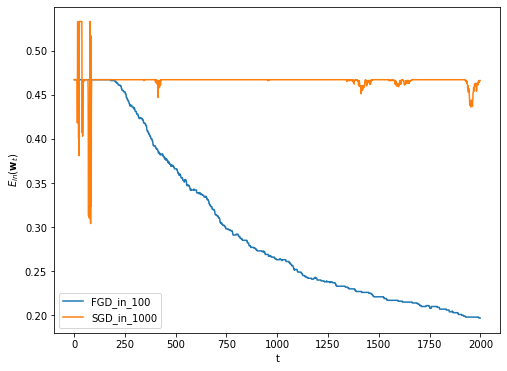

In [106]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))
x = np.arange(1,2000)
ax.plot(x,FGD_in_100,label="FGD_in_100")
ax.plot(x,SGD_in_1000, label = "SGD_in_1000")
ax.set_xlabel(r't')
ax.set_ylabel(r'$E_{in}({\bf w}_t)$')
ax.legend(loc='lower left')
plt.savefig("Ein.png")
print(FGD_in_100[-1])
print(SGD_in_1000[-1])

0.477
0.477


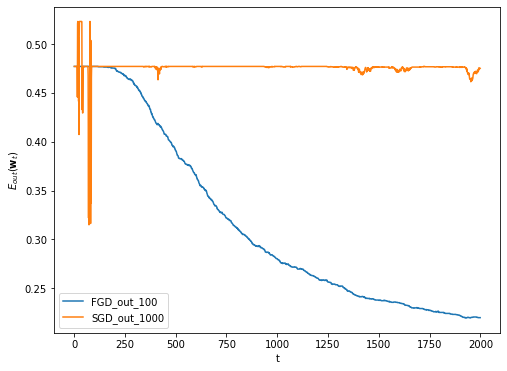

In [108]:
fig, ax = plt.subplots(figsize=(8,6))
x = np.arange(1,2000)
ax.plot(x,FGD_out_100,label="FGD_out_100")
ax.plot(x,SGD_out_1000, label="SGD_out_1000")
ax.set_xlabel(r't')
ax.set_ylabel(r'$E_{out}({\bf w}_t)$')
ax.legend(loc='lower left')
plt.savefig("Eout.png")
print(FGD_out_100[0])
print(SGD_out_1000[0])

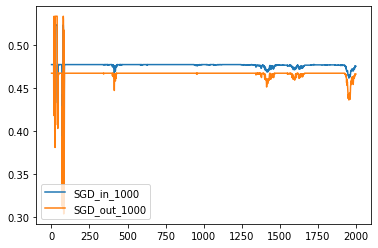

In [96]:
fig, ax = plt.subplots()
x = np.arange(1,2000)
ax.plot(x,SGD_in_1000,label = "SGD_in_1000")
ax.plot(x,SGD_out_1000, label = "SGD_out_1000")
ax.legend(loc='lower left')
plt.show()